In [1]:
import numpy as np
from scipy import stats
from scipy import io as spio
from scipy import misc
from scipy import special
from scipy import integrate
from scipy import linalg
from scipy.spatial.distance import pdist, squareform
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg

import pandas

%matplotlib inline

In [ ]:
for simplex in vor.ridge_vertices:
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):
        plt.plot(vor.vertices[simplex,0], vor.vertices[simplex,1], 'k-')

In [2]:
center = points.mean(axis=0)
for pointidx, simplex in zip(vor.ridge_points, vor.ridge_vertices):
    simplex = np.asarray(simplex)
    if np.any(simplex < 0):
        i = simplex[simplex >= 0][0] # finite end Voronoi vertex
        t = points[pointidx[1]] - points[pointidx[0]] # tangent
        t /= np.linalg.norm(t)
        n = np.array([-t[1], t[0]]) # normal
        midpoint = points[pointidx].mean(axis=0)
        far_point = vor.vertices[i] + np.sign(np.dot(midpoint - center, n)) * n * 100
        plt.plot([vor.vertices[i,0], far_point[0]],
                 [vor.vertices[i,1], far_point[1]], 'k--')
plt.show()

NameError: name 'points' is not defined

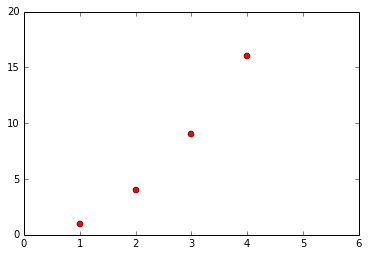

In [3]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

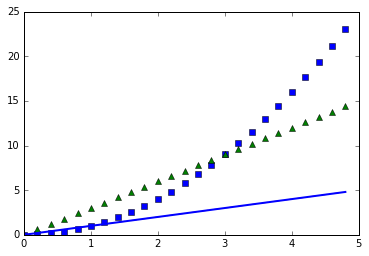

In [4]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'm--', t, t**2, 'bs', t, t*3, 'g^')
plt.plot(t, t, linewidth=2.0)
plt.show()

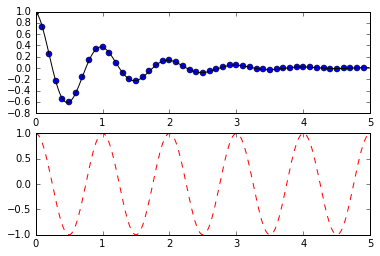

In [6]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

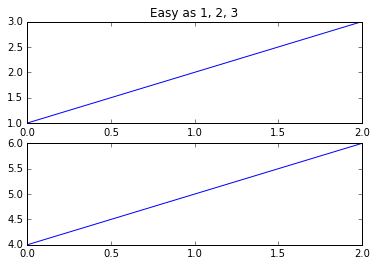

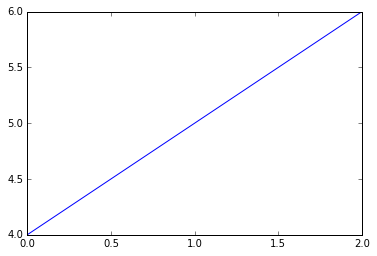

In [7]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title
plt.show()

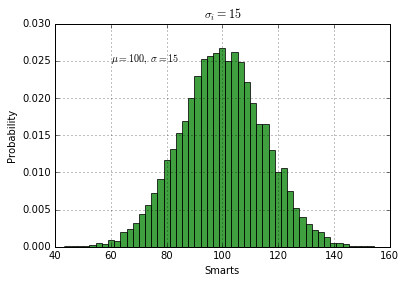

In [8]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
#plt.title('Histogram of IQ')
plt.title(r'$\sigma_i=15$')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

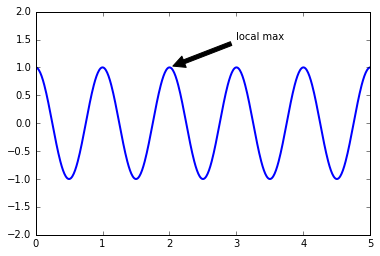

In [9]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()

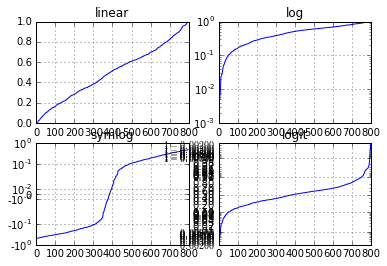

In [10]:
# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.05)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)

plt.show()

In [11]:
print plt.style.available

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [ ]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_gtkagg import FigureCanvasGTKAgg as FigureCanvas
from matplotlib.backends.backend_gtkagg import NavigationToolbar2GTKAgg as NavigationToolbar

win = gtk.Window()
win.connect("destroy", lambda x: gtk.main_quit())
win.set_default_size(400,300)
win.set_title("Embedding in GTK")

vbox = gtk.VBox()
win.add(vbox)

fig = Figure(figsize=(5,4), dpi=100)
ax = fig.add_subplot(111)
ax.plot([1,2,3])

canvas = FigureCanvas(fig)  # a gtk.DrawingArea
vbox.pack_start(canvas)
toolbar = NavigationToolbar(canvas, win)
vbox.pack_start(toolbar, False, False)

win.show_all()
gtk.main()

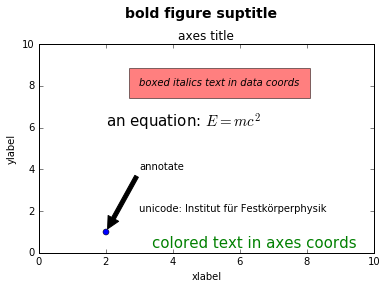

In [12]:
fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, u'unicode: Institut f\374r Festk\366rperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()

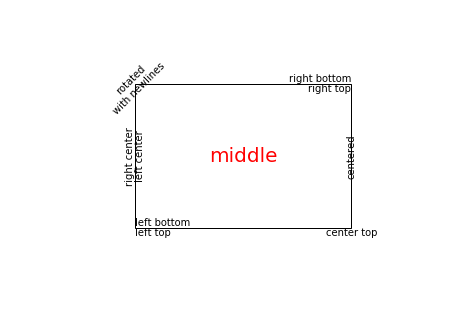

In [13]:
import matplotlib.patches as patches

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# axes coordinates are 0,0 is bottom left and 1,1 is upper right
p = patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False
    )

ax.add_patch(p)

ax.text(left, bottom, 'left top',
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes)

ax.text(left, bottom, 'left bottom',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes)

ax.text(right, top, 'right bottom',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)

ax.text(right, top, 'right top',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes)

ax.text(right, bottom, 'center top',
        horizontalalignment='center',
        verticalalignment='top',
        transform=ax.transAxes)

ax.text(left, 0.5*(bottom+top), 'right center',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)

ax.text(left, 0.5*(bottom+top), 'left center',
        horizontalalignment='left',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)

ax.text(0.5*(left+right), 0.5*(bottom+top), 'middle',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='red',
        transform=ax.transAxes)

ax.text(right, 0.5*(bottom+top), 'centered',
        horizontalalignment='center',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)

ax.text(left, top, 'rotated\nwith newlines',
        horizontalalignment='center',
        verticalalignment='center',
        rotation=45,
        transform=ax.transAxes)

ax.set_axis_off()
plt.show()

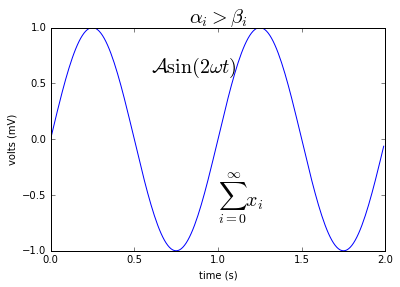

In [14]:
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)

plt.plot(t,s)
plt.title(r'$\alpha_i > \beta_i$', fontsize=20)
plt.text(1, -0.6, r'$\sum_{i=0}^\infty x_i$', fontsize=20)
plt.text(0.6, 0.6, r'$\mathcal{A}\mathrm{sin}(2 \omega t)$',
         fontsize=20)
plt.xlabel('time (s)')
plt.ylabel('volts (mV)')
plt.show()

In [15]:
from matplotlib.backends.backend_pgf import FigureCanvasPgf
mpl.backend_bases.register_backend('pdf', FigureCanvasPgf)

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1287: UserWarning: findfont: Font family [u'serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


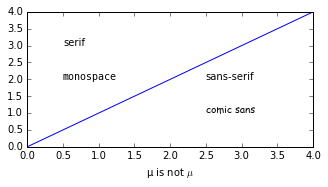

In [16]:
# -*- coding: utf-8 -*-

mpl.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
}
mpl.rcParams.update(pgf_with_rc_fonts)

plt.figure(figsize=(4.5,2.5))
plt.plot(range(5))
plt.text(0.5, 3., "serif")
plt.text(0.5, 2., "monospace", family="monospace")
plt.text(2.5, 2., "sans-serif", family="sans-serif")
plt.text(2.5, 1., "comic sans", family="Comic Sans MS")
plt.xlabel(u"µ is not $\\mu$")
plt.tight_layout(.5)
plt.show()

In [ ]:
# -*- coding: utf-8 -*-
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

from matplotlib.externals import six

import matplotlib as mpl
mpl.use("pgf")
pgf_with_custom_preamble = {
    "font.family": "serif", # use serif/main font for text elements
    "text.usetex": True,    # use inline math for ticks
    "pgf.rcfonts": False,   # don't setup fonts from rc parameters
    "pgf.preamble": [
         "\\usepackage{units}",         # load additional packages
         "\\usepackage{metalogo}",
         "\\usepackage{unicode-math}",  # unicode math setup
         r"\setmathfont{xits-math.otf}",
         r"\setmainfont{DejaVu Serif}", # serif font via preamble
         ]
}
mpl.rcParams.update(pgf_with_custom_preamble)

import matplotlib.pyplot as plt
plt.figure(figsize=(4.5,2.5))
plt.plot(range(5))
plt.xlabel("unicode text: я, ψ, €, ü, \\unitfrac[10]{°}{µm}")
plt.ylabel("\\XeLaTeX")
plt.legend(["unicode math: $λ=∑_i^∞ μ_i^2$"])
plt.tight_layout(.5)

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


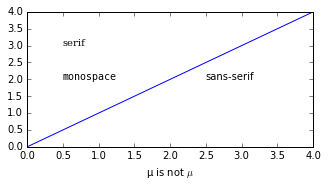

In [2]:
# -*- coding: utf-8 -*-

mpl.use("pgf")
pgf_with_pdflatex = {
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": [
         r"\usepackage[utf8x]{inputenc}",
         r"\usepackage[T1]{fontenc}",
         r"\usepackage{cmbright}",
         ]
}
mpl.rcParams.update(pgf_with_pdflatex)

plt.figure(figsize=(4.5,2.5))
plt.plot(range(5))
plt.text(0.5, 3., "serif", family="serif")
plt.text(0.5, 2., "monospace", family="monospace")
plt.text(2.5, 2., "sans-serif", family="sans-serif")
plt.xlabel(u"µ is not $\\mu$")
plt.tight_layout(.5)


In [3]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [ ]:
"""
Demo of TeX rendering.

You can use TeX to render all of your matplotlib text if the rc
parameter text.usetex is set.  This works currently on the agg and ps
backends, and requires that you have tex and the other dependencies
described at http://matplotlib.org/users/usetex.html
properly installed on your system.  The first time you run a script
you will see a lot of output from tex and associated tools.  The next
time, the run may be silent, as a lot of the information is cached in
~/.tex.cache

"""
import numpy as np
import matplotlib.pyplot as plt

import os
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2015/bin/x86_64-darwin'

# Example data
t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(4 * np.pi * t) + 2

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t, s)

plt.xlabel(r'\textbf{time} (s)')
plt.ylabel(r'\textit{voltage} (mV)',fontsize=16)
plt.title(r"\TeX\ is Number "
          r"$\displaystyle\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}$!",
          fontsize=16, color='gray')
# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)

plt.savefig('tex_demo')
plt.show()

In [ ]:
import os
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2015/bin/x86_64-darwin'
print(os.getenv("PATH"))

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
This demo is tex_demo.py modified to have unicode. See that file for
more information.
"""

from __future__ import unicode_literals
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.pyplot as plt

plt.figure(1, figsize=(6, 4))
ax = plt.axes([0.1, 0.1, 0.8, 0.7])
t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(2*2*np.pi*t) + 2
plt.plot(t, s)

plt.xlabel(r'\textbf{time (s)}')
plt.ylabel(r'\textit{Velocity (\u00B0/sec)}', fontsize=16)
plt.title(r"\TeX\ is Number \
          $\displaystyle\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}$!",
          fontsize=16, color='r')
plt.grid(True)
plt.show()

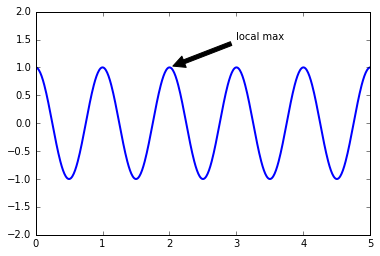

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.set_ylim(-2,2)
plt.show()

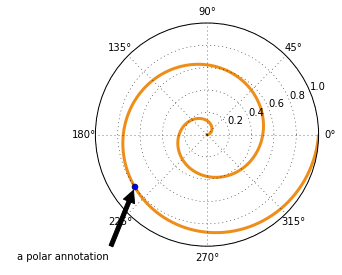

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
r = np.arange(0,1,0.001)
theta = 2*2*np.pi*r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
plt.show()

In [2]:
img=mpimg.imread('stinkbug.png')
img

array([[[ 0.40784314,  0.40784314,  0.40784314],
        [ 0.40784314,  0.40784314,  0.40784314],
        [ 0.40784314,  0.40784314,  0.40784314],
        ..., 
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098]],

       [[ 0.41176471,  0.41176471,  0.41176471],
        [ 0.41176471,  0.41176471,  0.41176471],
        [ 0.41176471,  0.41176471,  0.41176471],
        ..., 
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098]],

       [[ 0.41960785,  0.41960785,  0.41960785],
        [ 0.41568628,  0.41568628,  0.41568628],
        [ 0.41568628,  0.41568628,  0.41568628],
        ..., 
        [ 0.43137255,  0.43137255,  0.43137255],
        [ 0.43137255,  0.43137255,  0.43137255],
        [ 0.43137255,  0.43137255,  0.43137255]],

       ..., 
       [[ 0.43921569,  0.43921569,  0.43921569],
        

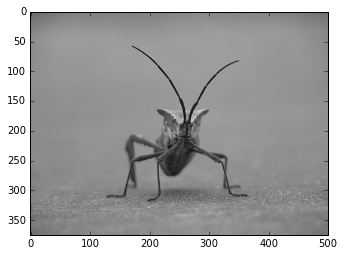

In [3]:
imgplot = plt.imshow(img)

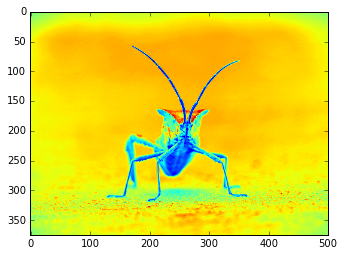

In [4]:
lum_img = img[:,:,0]
plt.imshow(lum_img)

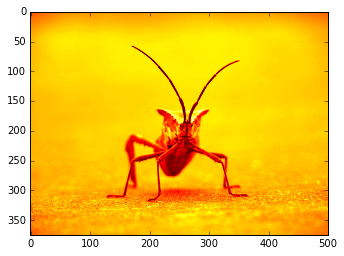

In [5]:
plt.imshow(lum_img, cmap="hot")

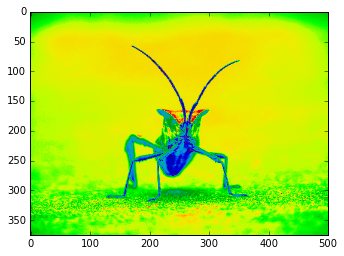

In [6]:
# Note that you can also change colormaps on existing plot objects using the set_cmap() method:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('spectral')

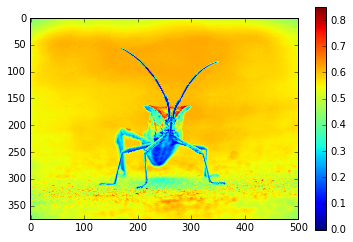

In [7]:
imgplot = plt.imshow(lum_img)
plt.colorbar()

(array([  2.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   7.00000000e+00,
          9.00000000e+00,   7.00000000e+00,   2.00000000e+00,
          7.00000000e+00,   1.00000000e+01,   1.10000000e+01,
          1.50000000e+01,   1.40000000e+01,   2.70000000e+01,
          2.10000000e+01,   2.40000000e+01,   1.40000000e+01,
          3.10000000e+01,   2.90000000e+01,   2.80000000e+01,
          2.40000000e+01,   2.40000000e+01,   4.00000000e+01,
          2.60000000e+01,   5.20000000e+01,   3.90000000e+01,
          5.70000000e+01,   4.60000000e+01,   8.40000000e+01,
          7.60000000e+01,   8.90000000e+01,   8.00000000e+01,
          1.06000000e+02,   1.13000000e+02,   1.12000000e+02,
          9.00000000e+01,   1.16000000e+02,   1.09000000e+02,
          1.27000000e+02,   1.35000000e+02,   9.80000000e+01,
          1.31000000e+02,   1.23000000e+02,   1.11000000e+02,
        

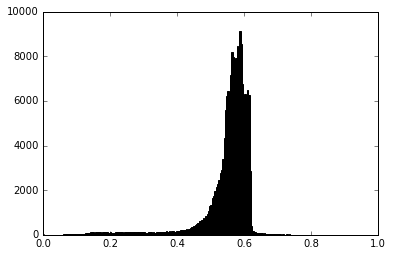

In [8]:
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

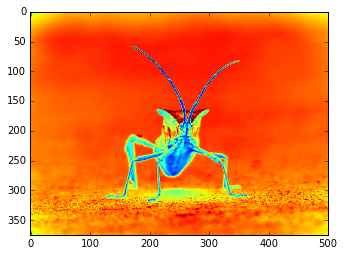

In [9]:
imgplot = plt.imshow(lum_img, clim=(0.0, 0.7))

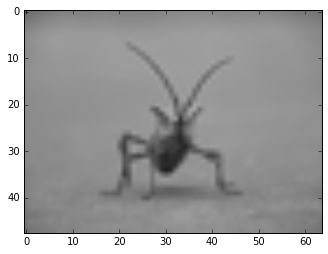

In [20]:
from PIL import Image
img = Image.open('stinkbug.png')
resized = img.thumbnail((64, 64), Image.ANTIALIAS) # resizes image in-place
imgplot = plt.imshow(img)

TypeError: Image data can not convert to float

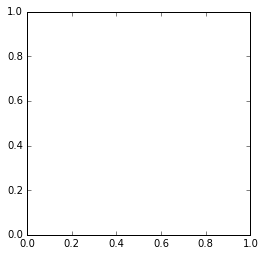

In [21]:
imgplot = plt.imshow(resized, interpolation="nearest")

TypeError: Image data can not convert to float

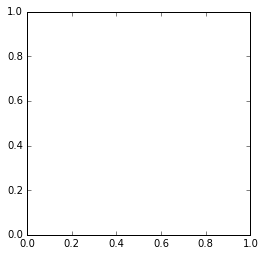

In [22]:
imgplot = plt.imshow(resized, interpolation="bicubic")